In [101]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np 
import seaborn as sns 
import requests as req
import os
from scipy.stats import sem
import scipy.stats as st
from sklearn import linear_model


In [103]:
#Convert excel to csv
data = pd.read_excel('NBA_Salary_History.xlsx', 'Team Salaries', index_col=None)
data.to_csv('cap_output.csv', 
            encoding='utf-8', 
            float_format='%.2f')

In [38]:
#Read CSVs and Combine to One Dataframe
data_one = "input/NBASalaryData03-17.csv"
data_pd = pd.read_csv(data_one)
data_df = data_pd.dropna()
data_df.head()

,team,salary,player,position,season
0,Minnesota Timberwolves,25200000.0,Kevin Garnett,PF,2002-2003
1,Portland Trail Blazers,13500000.0,Damon Stoudamire,PG,2002-2003
2,Seattle SuperSonics,13080000.0,Gary Payton,PG,2002-2003
3,Seattle SuperSonics,12375000.0,Ray Allen,SG,2002-2003
4,New York Knicks,12375000.0,Latrell Sprewell,SG,2002-2003


In [105]:
# Remove NaN values
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]

# Filter the date by season
data_range = data_df[data_df["season"] == "2016-2017"]

# Update the season to show one year
new_range = data_range.replace({'2016-2017': 2017})

# Change "player" to "Player"
new_columns = data_range.columns.values
new_columns[2] = 'Player'
data_range.columns = new_columns 

# Reset the index
new_range = new_range.reset_index(drop=True)

# Add a new column to show salary in millions of dollars
new_range['Salary (millions)'] = ['${:,.2f}'.format(x) for x in new_range['salary']/1000000]

# Change Salary (millions) to float
new_range['Salary (millions)'] = new_range['Salary (millions)'].str.replace('$', '').astype(float)

# Sort values by salary in ascending order
sort_by_salary= new_range.sort_values('Salary (millions)')
sort_by_salary.reset_index()

,index,team,salary,Player,position,season,Salary (millions)
0,461,Cleveland Cavaliers,5767.0,Dahntay Jones,SG,2017,0.01
1,458,Phoenix Suns,23069.0,Elijah Millsap,SG,2017,0.02
2,460,Milwaukee Bucks,15435.0,Axel Toupane,SG,2017,0.02
3,459,Dallas Mavericks,15984.0,Quinn Cook,PG,2017,0.02
4,455,Dallas Mavericks,31969.0,Pierre Jackson,PG,2017,0.03
5,457,Orlando Magic,31969.0,Marcus Georges-Hunt,F,2017,0.03
6,456,Orlando Magic,31969.0,Patricio Garino,SG,2017,0.03
7,454,Milwaukee Bucks,35116.0,Gary Payton II,G,2017,0.04
8,453,Philadelphia 76ers,35166.0,Alex Poythress,SF,2017,0.04
9,452,Dallas Mavericks,47953.0,Jarrod Uthoff,SF,2017,0.05


In [106]:
# # Filter the date by season
# data_range = data_df[data_df["season"] == "2016-2017"]
# data_range.head()

In [107]:
# # Update the season to show one year
# new_range = data_range.replace({'2016-2017': 2017})

# # Change "player" to "Player"
# new_columns = data_range.columns.values
# new_columns[2] = 'Player'
# data_range.columns = new_columns 

In [108]:
# Reset the index
# new_range = new_range.reset_index(drop=True)
# new_range.head()

In [109]:
# # Add a new column to show salary in millions of dollars
# new_range['Salary (millions)'] = ['${:,.2f}'.format(x) for x in new_range['salary']/1000000]
# new_range.head()

In [110]:
# # Chech object types
# new_range.dtypes

In [111]:
# # Change Salary (millions) to float
# new_range['Salary (millions)'] = new_range['Salary (millions)'].str.replace('$', '').astype(float)

In [112]:
# # re-check object type
# new_range.dtypes

In [113]:
# # Sort values by salary in ascending order
# sort_by_salary= new_range.sort_values('Salary (millions)')
# sort_by_salary.reset_index()

In [114]:
# Create new DataFrame to display Player and Salary data
salary = sort_by_salary[["Player", "Salary (millions)"]]
salary.head(10)

,Player,Salary (millions)
461,Dahntay Jones,0.01
458,Elijah Millsap,0.02
460,Axel Toupane,0.02
459,Quinn Cook,0.02
455,Pierre Jackson,0.03
457,Marcus Georges-Hunt,0.03
456,Patricio Garino,0.03
454,Gary Payton II,0.04
453,Alex Poythress,0.04
452,Jarrod Uthoff,0.05


In [115]:
# Average Salary for total NBA, top ten players, and bottom 10 players
nba_average = salary.mean(axis=0)
top_ten_avg = salary.tail(10).mean()
bottom_ten_avg = salary.head(10).mean()

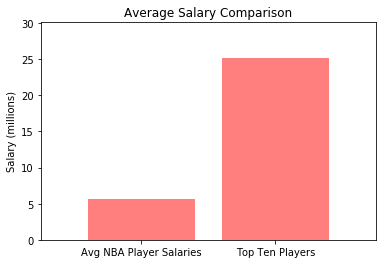

In [117]:
types = ["Avg NBA Player Salaries", "Top Ten Players"]
averages = [5.61829, 25.092]
x_axis = np.arange(len(averages))

# Plot bar graph
plt.bar(x_axis, averages, color='r', alpha=0.5, align="center")

# Set x-values 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, types)

# Set x- and y-axis limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(averages)+5)

# Give the chart a title, x label, and y label
plt.title("Average Salary Comparison")
plt.ylabel("Salary (millions)")
plt.savefig("AvgSalary_vs_Top10")

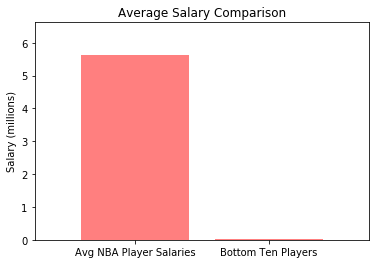

In [118]:
types = ["Avg NBA Player Salaries",  "Bottom Ten Players"]
averages = [5.61829, 0.029]
x_axis = np.arange(len(averages))

# Plot bar graph
plt.bar(x_axis, averages, color='r', alpha=0.5, align="center")

# Set x-values 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, types)

# Set x- and y-axis limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(averages)+1)

# Give the chart a title, x label, and y label
plt.title("Average Salary Comparison")
plt.ylabel("Salary (millions)")

plt.savefig("AvgSalary_vs_Bottom10")

In [120]:
# Import and cleanup csv
data_two = "nba_shot_types.csv"
data_pd_two = pd.read_csv(data_two)
data_df_two = data_pd_two.dropna()
data_df_two.head()

,YEAR,PLAYER,TEAM,AGE,GP,W,L,MIN,PCT_FGA_2PT,PCT_FGA_3PT,...,PCT_PTS_FSTBRK,PCT_PTS_FT,PCT_PTS_OFF_TOS,PCT_PTS_INTHEPT,PCT_2PTGFM_ASSTD,PCT_2PTGFM_UNASSTD,PCT_3PTGFM_ASSTD,PCT_3PTGFM_UNASSTD,PCT_FGM_ASSTD,PCT_FGM_UNASSTD
0,2018-2019,Aaron Gordon,ORL,23,78,40,38,33.8,66.8,33.2,...,12.0,14.8,13.7,46.7,50.4,49.6,84.3,15.7,59.1,40.9
1,2018-2019,Aaron Holiday,IND,22,50,31,19,12.9,51.5,48.5,...,15.0,13.9,16.3,29.3,38.7,61.3,79.1,20.9,55.2,44.8
2,2018-2019,Abdel Nader,OKC,25,61,38,23,11.4,53.5,46.5,...,18.7,11.2,20.3,47.3,49.2,50.8,96.9,3.1,65.9,34.1
3,2018-2019,Al Horford,BOS,33,68,41,27,29.0,71.9,28.1,...,5.0,8.4,11.5,47.8,75.2,24.8,100.0,0.0,79.8,20.2
4,2018-2019,Al-Farouq Aminu,POR,28,81,52,29,28.3,52.8,47.2,...,13.6,19.7,15.9,40.5,51.6,48.4,100.0,0.0,69.6,30.4


In [121]:
# drop columns with NaN values
data_df_two = data_df_two.loc[:, ~data_df_two.columns.str.contains('^Unnamed')]

# Filter the date by year
data_range_two = data_df_two[data_df_two["YEAR"] == "2016-2017"]

# Replace 2016-2017 with 2017
new_range_two = data_range_two.replace({'2016-2017': 2017})

# Replace "PLAYER" with "Player" so data sets can be merged
new_columns_two = data_range_two.columns.values
new_columns_two[1] = 'Player'
data_range_two.columns = new_columns_two

# reset index
new_range_two = new_range_two.reset_index(drop=True)

# create new df to include only necessary data
mins_per_game = new_range_two[["YEAR", "Player", "TEAM", "MIN"]]

# merge two DataFrames
merge_df = pd.merge(new_range, mins_per_game, on="Player")
merge_df.head()

,team,salary,Player,position,season,Salary (millions),YEAR,TEAM,MIN
0,Cleveland Cavaliers,30963450.0,LeBron James,SF,2017,30.96,2017,CLE,37.8
1,LA Clippers,22868827.0,Chris Paul,PG,2017,22.87,2017,LAC,31.5
2,Memphis Grizzlies,22116750.0,Chandler Parsons,SF,2017,22.12,2017,MEM,19.8
3,Washington Wizards,22116750.0,Bradley Beal,SG,2017,22.12,2017,WAS,34.9
4,New Orleans Pelicans,22116750.0,Anthony Davis,PF,2017,22.12,2017,NOP,36.1


In [122]:
# # Filter the date
# data_range_two = data_df_two[data_df_two["YEAR"] == "2016-2017"]
# data_range_two.head()

In [123]:
# # Replace 2016-2017 with 2017
# new_range_two = data_range_two.replace({'2016-2017': 2017})

# # Replace "PLAYER" with "Player" so data sets can be merged
# new_columns_two = data_range_two.columns.values
# new_columns_two[1] = 'Player'
# data_range_two.columns = new_columns_two

In [124]:
# # reset index
# new_range_two = new_range_two.reset_index(drop=True)
# new_range_two.head()

In [125]:
# # create new df
# mins_per_game = new_range_two[["YEAR", "Player", "TEAM", "MIN"]]
# mins_per_game.head()

In [127]:
# # merge two DataFrames
# merge_df = pd.merge(new_range, mins_per_game, on="Player")
# merge_df.head()

In [128]:
# check object types
merge_df.dtypes

team                  object
salary               float64
Player                object
position              object
season                 int64
Salary (millions)    float64
YEAR                   int64
TEAM                  object
MIN                  float64
dtype: object

KeyError: 'MIN'

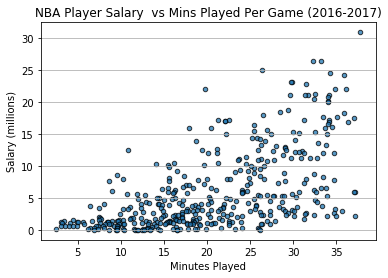

In [129]:
# create scatter plot for salary vs mins played
merge_df.plot(x="MIN", y="Salary (millions)", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("NBA Player Salary  vs Mins Played Per Game (2016-2017)")
plt.xlabel("Minutes Played")
plt.ylabel("Salary (millions)")
plt.grid(axis = 'y')
plt.xlim(-0.25, len(new_range["MIN"]))
plt.show()

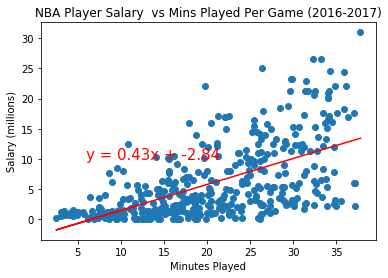

In [131]:
# Add the linear regression equation and line to plot
x_values = merge_df['MIN']
y_values = merge_df['Salary (millions)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NBA Player Salary  vs Mins Played Per Game (2016-2017)")
plt.xlabel("Minutes Played")
plt.ylabel("Salary (millions)")
plt.savefig("Salary_vs_MinsPlayed")
plt.show()

In [66]:
# The next example will compute the Pearson correlation coefficient between "Mins Played" and "Salary"
player_salary = merge_df.iloc[:,5]
minutes = merge_df.iloc[:,8]
correlation_1 = st.pearsonr(player_salary, minutes)
print(f"The correlation between both factors is {round(correlation_1[0],2)}")

The correlation between both factors is 0.6


In [68]:
# print statistics for salary and mins played
X = merge_df[['MIN']] 
Y = merge_df['Salary (millions)']
 

print('------------------------------------------------------------------------------------------')

# with statsmodels
X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      Salary (millions)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     228.5
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           2.42e-41
Time:                        11:15:13   Log-Likelihood:                -1246.8
No. Observations:                 412   AIC:                             2498.
Df Residuals:                     410   BIC:                             2506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

TWITTER VS PLAYER SALARY

In [78]:
#Read CSVs and Combine to One Dataframe
data_three = "nba_2017_twitter_players.csv"
data_pd_three = pd.read_csv(data_three)
data_df_three = data_pd_three.dropna()
data_df_three.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [81]:
# Remove NaN values
data_df_three = data_df_three.loc[:, ~data_df_three.columns.str.contains('^Unnamed')]
data_df_three.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [84]:
# check object type
data_df_three.dtypes

PLAYER                     object
TWITTER_FAVORITE_COUNT    float64
TWITTER_RETWEET_COUNT     float64
dtype: object

In [85]:
# Replace "PLAYER" with "Player"
new_columns_three = data_df_three.columns.values
new_columns_three[0] = 'Player'
data_df_three.columns = new_columns_three

In [86]:
# Merge DataFrames
merge_df_twitter = pd.merge(new_range, data_df_three, on="Player")
merge_df_twitter.head()

,team,salary,Player,position,season,Salary (millions),TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Cleveland Cavaliers,30963450.0,LeBron James,SF,2017,30.96,5533.5,1501.5
1,LA Clippers,22868827.0,Chris Paul,PG,2017,22.87,829.0,178.5
2,Memphis Grizzlies,22116750.0,Chandler Parsons,SF,2017,22.12,59.0,16.0
3,Washington Wizards,22116750.0,Bradley Beal,SG,2017,22.12,55.5,40.5
4,New Orleans Pelicans,22116750.0,Anthony Davis,PF,2017,22.12,368.0,104.0


KeyError: 'TWITTER_FAVORITE_COUNT'

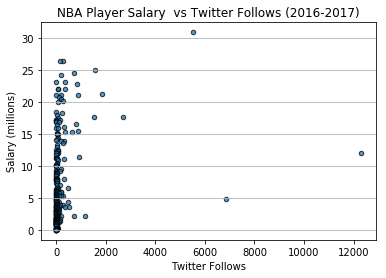

In [88]:
# Create scatter plot to compare salary vs Twitter Favorites
merge_df_twitter.plot(x="TWITTER_FAVORITE_COUNT", y="Salary (millions)", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("NBA Player Salary  vs Twitter Follows (2016-2017)")
plt.xlabel("Twitter Follows")
plt.ylabel("Salary (millions)")
plt.grid(axis = 'y')
plt.xlim(-0.25, len(new_range["TWITTER_FAVORITE_COUNT"]))
plt.show()

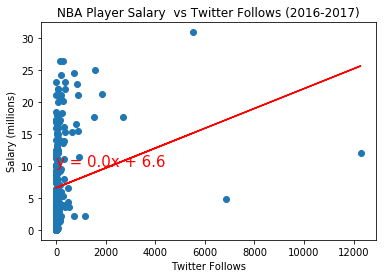

In [89]:
# Add the linear regression equation and line to plot
x_values = merge_df_twitter['TWITTER_FAVORITE_COUNT']
y_values = merge_df_twitter['Salary (millions)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NBA Player Salary  vs Twitter Follows (2016-2017)")
plt.xlabel("Twitter Follows")
plt.ylabel("Salary (millions)")
plt.savefig("Salary_vs_Twitter")
plt.show()

In [90]:
# The next example will compute the Pearson correlation coefficient between "Twitter Followers" and "Salary"
twitter = merge_df_twitter.iloc[:,6]
salary = merge_df_twitter.iloc[:,5]
correlation = st.pearsonr(twitter,salary)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.22


POINTS PER GAME VS SALARY

In [91]:
# Import DataFrame
data_four = "nba_2017_nba_players_with_salary.csv"
data_pd_four = pd.read_csv(data_four)
data_df_four = data_pd_four.dropna()
data_df_four.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [92]:
# Remove NaN values
data_df_four = data_df_four.loc[:, ~data_df_four.columns.str.contains('^Unnamed')]
data_df_four.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [93]:
# Check object type
data_df_four.dtypes

Rk                   int64
PLAYER              object
POSITION            object
AGE                  int64
MP                 float64
FG                 float64
FGA                float64
FG%                float64
3P                 float64
3PA                float64
3P%                float64
2P                 float64
2PA                float64
2P%                float64
eFG%               float64
FT                 float64
FTA                float64
FT%                float64
ORB                float64
DRB                float64
TRB                float64
AST                float64
STL                float64
BLK                float64
TOV                float64
PF                 float64
POINTS             float64
TEAM                object
GP                   int64
MPG                float64
ORPM               float64
DRPM               float64
RPM                float64
WINS_RPM           float64
PIE                float64
PACE               float64
W                    int64
S

In [94]:
# Create new df
points_per_game = data_df_four[["PLAYER", "POINTS", "TEAM"]]
points_per_game.head()

,PLAYER,POINTS,TEAM
0,Russell Westbrook,31.6,OKC
1,James Harden,29.1,HOU
2,Isaiah Thomas,28.9,BOS
3,Anthony Davis,28.0,NO
4,DeMarcus Cousins,27.0,NO/SAC


In [95]:
# Rename column header
new_columns_four = points_per_game.columns.values
new_columns_four[0] = 'Player'
points_per_game.columns = new_columns_four


In [96]:
# Merge df
merge_df_points = pd.merge(new_range, points_per_game, on="Player")
merge_df_points.head()

,team,salary,Player,position,season,Salary (millions),POINTS,TEAM
0,Cleveland Cavaliers,30963450.0,LeBron James,SF,2017,30.96,26.4,CLE
1,LA Clippers,22868827.0,Chris Paul,PG,2017,22.87,18.1,LAC
2,Memphis Grizzlies,22116750.0,Chandler Parsons,SF,2017,22.12,6.2,MEM
3,Washington Wizards,22116750.0,Bradley Beal,SG,2017,22.12,23.1,WSH
4,New Orleans Pelicans,22116750.0,Anthony Davis,PF,2017,22.12,28.0,NO


KeyError: 'POINTS'

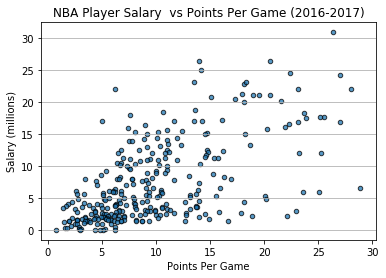

In [97]:
# Create scatter plot
merge_df_points.plot(x="POINTS", y="Salary (millions)", kind="scatter", marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title("NBA Player Salary  vs Points Per Game (2016-2017)")
plt.xlabel("Points Per Game")
plt.ylabel("Salary (millions)")
plt.grid(axis = 'y')
plt.xlim(-0.25, len(new_range["POINTS"]))
plt.show()

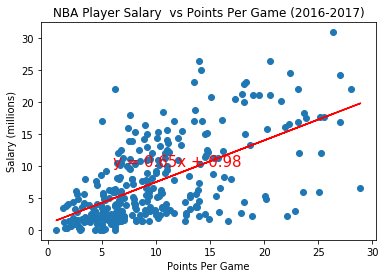

In [98]:
# Add the linear regression equation and line to plot
x_values = merge_df_points['POINTS']
y_values = merge_df_points['Salary (millions)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NBA Player Salary  vs Points Per Game (2016-2017)")
plt.xlabel("Points Per Game")
plt.ylabel("Salary (millions)")
plt.savefig("Salary_vs_PPG")
plt.show()

In [99]:
# The next example will compute the Pearson correlation coefficient between "Points Per Game" and "Salary"
points = merge_df_points.iloc[:,6]
salary = merge_df_points.iloc[:,5]
correlation_2 = st.pearsonr(points,salary)
print(f"The correlation between both factors is {round(correlation_2[0],2)}")

The correlation between both factors is 0.61


In [100]:
# Show statistics
X = merge_df_points[['POINTS']] 
Y = merge_df_points['Salary (millions)']
 

print('------------------------------------------------------------------------------------------')

# with statsmodels
X = sm.add_constant(X)
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:      Salary (millions)   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           1.23e-31
Time:                        11:29:02   Log-Likelihood:                -916.72
No. Observations:                 301   AIC:                             1837.
Df Residuals:                     299   BIC:                             1845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------